In [250]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [251]:
import json
from operator import itemgetter

owdata = []

def get_data( index ) :
    
    with open('data{}_{}.json'.format( index*50, index*50+50 )) as data_file:    
        data = json.load( data_file )

    for player in data:
        for server in player:

            if server in ['eu', 'us', 'kr'] and player[server] and player[server]['stats']['competitive'] and player[server]['stats']['competitive']['overall_stats']['comprank'] and player[server]['stats']['competitive']['overall_stats']['comprank'] > 1000 and player[server]['stats']['competitive']['overall_stats']['win_rate'] > 10:

                owdata.append( (player[server]['stats']['competitive']['overall_stats']['comprank'],
                                player[server]['stats']['competitive']['overall_stats']['win_rate']) )
            
for i in range(10):
    get_data( i )
    
print( len(owdata) )

902


In [294]:
# sort all data on win_rate (x-axis)
owdata = sorted(  owdata, key=lambda v:v[1] )

# x
win_rates_train = np.array( [ [d[1]] for d in owdata[1::20] ] )
win_rates_test = np.array( [ [d[1]] for d in owdata[::] ] )

# print( win_rates_train )
# print( win_rates_test )

#  y
skill_ratings_train = np.array( [ [d[0]] for d in owdata[1::20] ] )
skill_ratings_test = np.array( [ [d[0]] for d in owdata[::] ] )

In [304]:
win_rates_train = np.hstack([win_rates_train, win_rates_train**2, win_rates_train**3, win_rates_train**4])
win_rates_test = np.hstack([win_rates_test, win_rates_test**2, win_rates_test**3, win_rates_test**4])

In [305]:
# Create linear regression object
regr = linear_model.LinearRegression()

regr.fit( win_rates_train, skill_ratings_train )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [306]:
# Plot outputs

plt.figure( figsize=(16,8) )

plt.scatter( win_rates_test[:,0], skill_ratings_test, c=[0.3,0.3,1,0.5] )
plt.plot( win_rates_test[:,0], regr.predict( win_rates_test ), c=[0.8,0,0,0.9], linewidth=1.5)

plt.scatter( win_rates_train[:,0], skill_ratings_train, c=[1,0.3,0.3,0.5] )
# plt.plot( win_rates_train[:,0], regr.predict( win_rates_train ), c=[0.8,0,0,0.9], linewidth=1.5)

for  i, dot in enumerate(win_rates_train[:]):
    y1 = skill_ratings_train[i][0]
    y2 = regr.predict(dot)[0][0]
    plt.plot( np.array([dot[0], dot[0]]), np.array([y1, y2]), ':', c=[1,0.3,0.3,0.7] )

plt.legend(['Estimation', 'Real Data'])

plt.xlabel('Win Rate')
plt.ylabel('Skill Rating')

C:\Users\Berk\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\Berk\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\Berk\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning

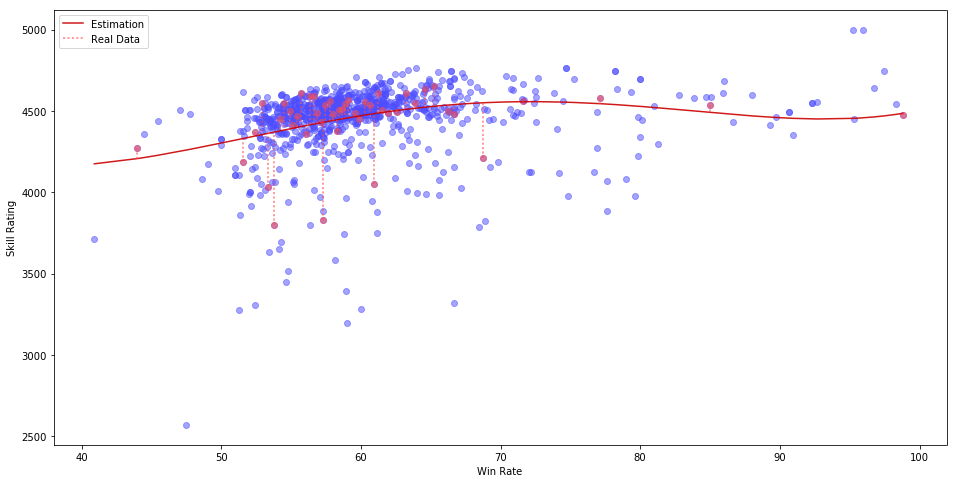

In [307]:
plt.show()

In [308]:
print('Coefficients: ', regr.coef_)

y = skill_ratings_test
y_reg = regr.predict(win_rates_test)

y_mean = sum(y) / len(y)
print( 'Mean:', y_mean[0] )

ss_tot = sum( (y - y_mean)**2 )
print( 'Total sum of squares', y_tot)

ss_res = sum( (y - y_reg)**2 )
print( 'Residual sum of squares', ss_res[0] )
 
r2 = 1 - ss_res / ss_tot
print( 'Mean squared error:', r2[0] )

Coefficients:  [[ -3.93793696e+02   1.00269995e+01  -1.04501542e-01   3.85362121e-04]]
Mean: 4449.67405765
Total sum of squares 4448.71428571
Residual sum of squares 37847849.7753
Mean squared error: 0.0754922040289
